In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('D:\IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
count = data['species'].value_counts()
count.to_frame()

,species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
label = count.index.tolist()
val = count.values.tolist()

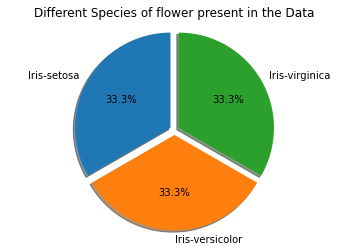

In [11]:
exp = (0.05,0.05,0.05)
fig,ax = plt.subplots()
ax.pie(val, explode=exp, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Different Species of flower present in the Data")
ax.axis('equal')
plt.show()

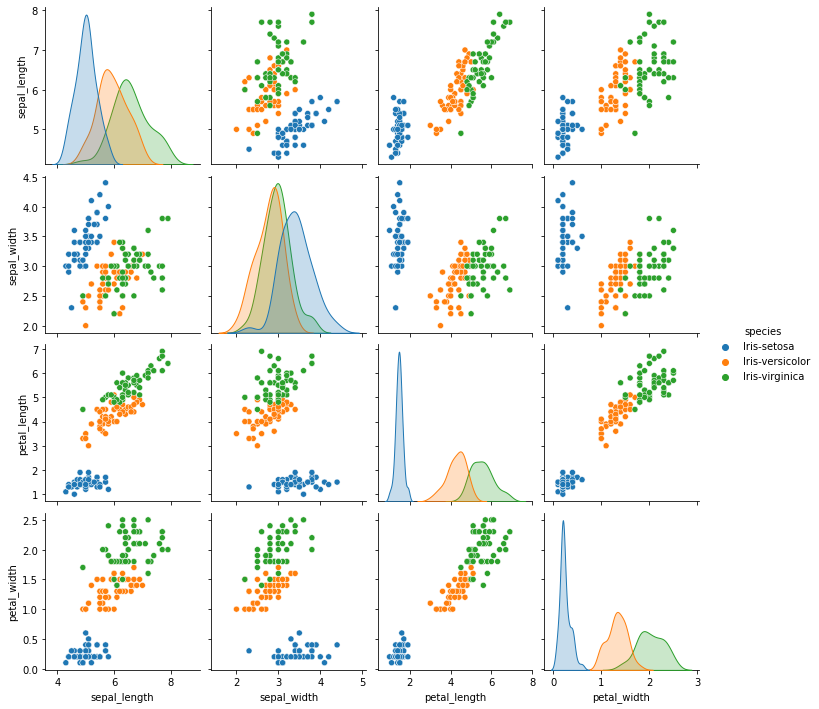

In [12]:
sns.pairplot(data=data, hue='species')
plt.show()

<AxesSubplot:>

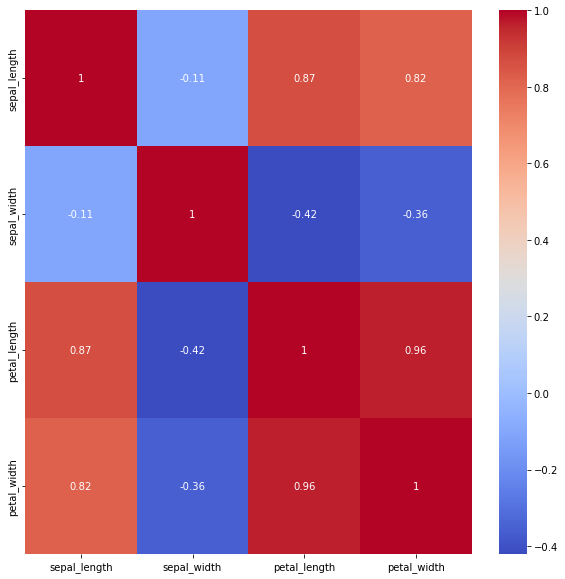

In [13]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [1]:
data = data.drop('id',axis=1)
data.head()

NameError: name 'data' is not defined

In [15]:
x = data.iloc[:, 0:4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y = (data.iloc[:, 4])
y.head().to_frame()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()
x = std.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
acc = accuracy_score(y_test, y_pred)
print("The Accuracy of the Decision Tree Algorithms is : ", str(acc*100) + "%")

The Accuracy of the Decision Tree Algorithms is :  95.55555555555556%


In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [28]:
lst = data['species'].unique().tolist()
df_cm = pd.DataFrame(data = cm, index = lst, columns = lst)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,17,1
Iris-virginica,0,1,12


In [29]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [30]:
col = data.columns.tolist()
print(col)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [31]:
from sklearn.tree import plot_tree

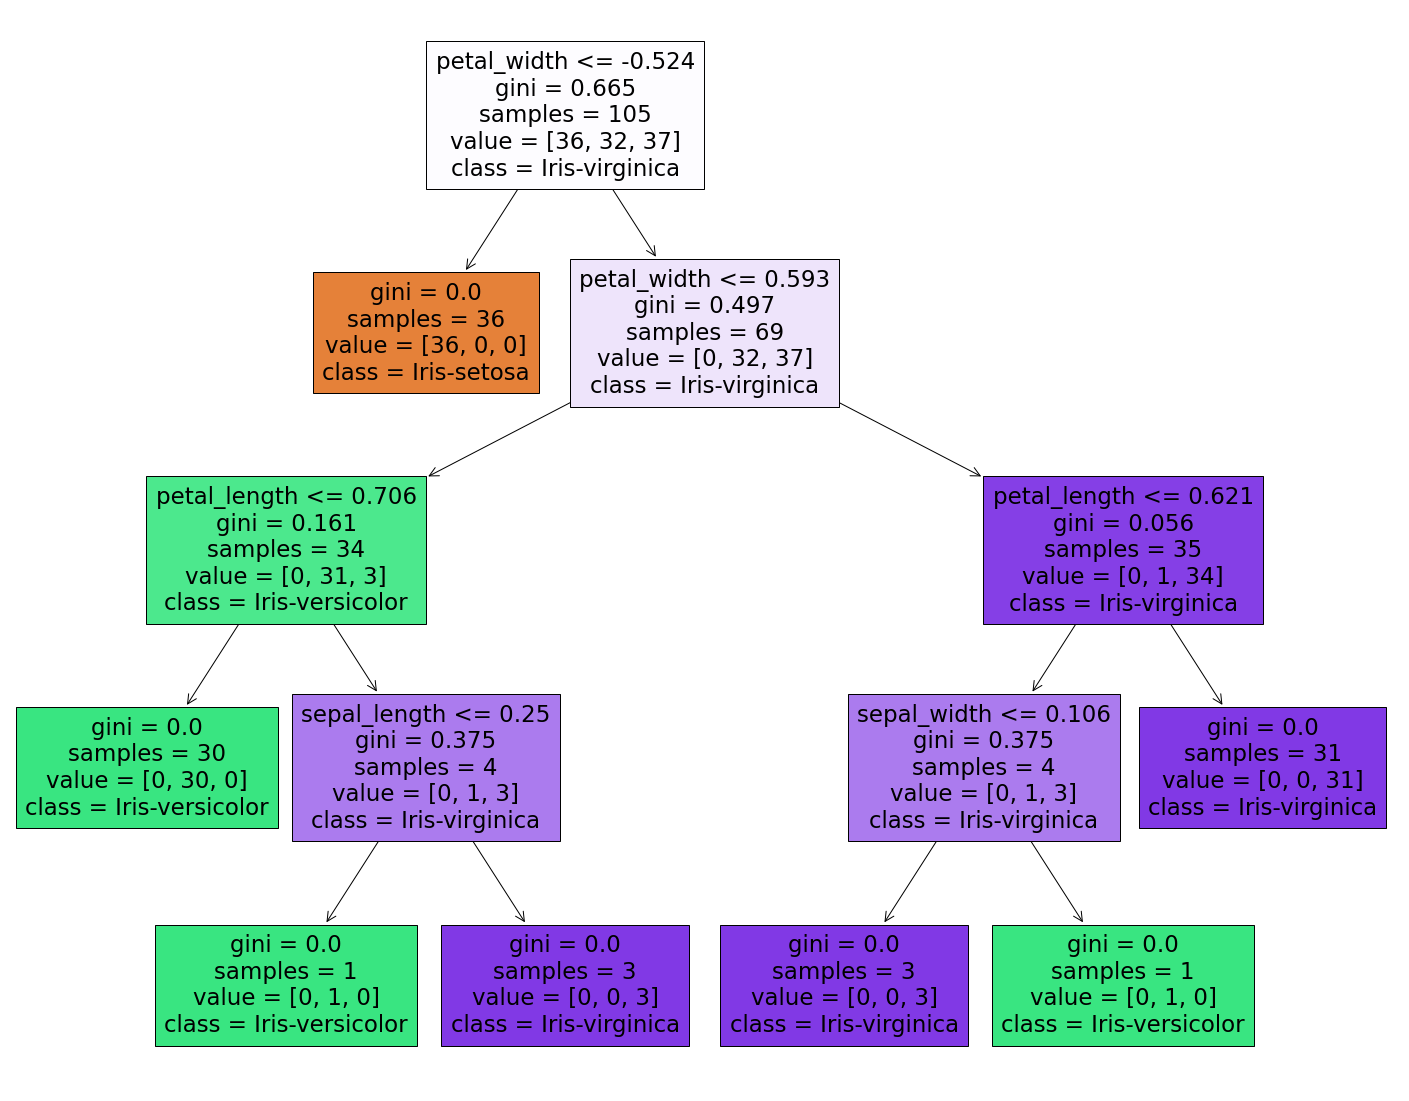

In [32]:
fig = plt.figure(figsize=(25, 20))
tree_img = plot_tree(model, feature_names = col, class_names = lst, filled = True)